In [69]:
import pandas as pd

# Import Data

In [70]:
df = pd.read_csv("../data/llamadas_emargencia.csv", sep=";", encoding='latin-1')
df.sample(5)

C:\Users\crisi\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,ANIO,MES,TIPO_INCIDENTE,TIPO_DETALLE,COD_LOCALIDAD,LOCALIDAD,COD_UPZ,UPZ,CANT_INCIDENTES
239507,20210407UPZ999922,2021,4,922,NARCÓTICOS,7,BOSA,UPZ999,SIN LOCALIZACION,78
524140,20180404UPZ50716,2018,4,716,FUGA DE GAS NATURAL O PROPANO,4,SAN CRISTÓBAL,UPZ50,LA GLORIA,20
275170,20201118UPZ999946,2020,11,946,REMISIÓN DE DINERO O ACOMPAÑAMIENTO,18,RAFAEL URIBE URIBE,UPZ999,SIN LOCALIZACION,1
90559,20221013UPZ104936,2022,10,936,PERSONA TENDIDA EN LA VÍA,13,TEUSAQUILLO,UPZ104,PARQUE SIMON BOLIVAR - CAN,2
12868,20230808UPZ47936,2023,8,936,PERSONA TENDIDA EN LA VÍA,8,KENNEDY,UPZ47,KENNEDY CENTRAL,6


# Data Wrangling

### Drop Unnecesary Columns

In [71]:
df.drop(columns=["ID","TIPO_INCIDENTE","COD_UPZ","COD_LOCALIDAD"], inplace=True)
print(df.shape)
df.sample(5)

(549496, 6)


,ANIO,MES,TIPO_DETALLE,LOCALIDAD,UPZ,CANT_INCIDENTES
507091,2018,6,INDEBIDO USO DE ESTABLECIMIENTO,KENNEDY,KENNEDY CENTRAL,17
37143,2023,5,INCENDIO,KENNEDY,AMERICAS,9
186108,2021,10,DAÑOS EN REDES DE SERVICIOS,CIUDAD BOLÍVAR,MONTE BLANCO,1
404195,2019,7,ANIMAL MALTRATADO,SUBA,UPR ZONA NORTE,23
49548,2023,3,VEHÍCULO MAL ESTACIONADO,PUENTE ARANDA,ZONA INDUSTRIAL,28


### Limit data to last 5 years

In [72]:
df = df[df["ANIO"] >= 2019]
print(df.shape)
df.sample(5)

(455504, 6)


,ANIO,MES,TIPO_DETALLE,LOCALIDAD,UPZ,CANT_INCIDENTES
53767,2023,3,MALTRATO,TUNJUELITO,SIN LOCALIZACION,10
437029,2019,3,ELEMENTO CAÍDO Y/O EN PELIGRO DE CAER.,KENNEDY,CARVAJAL,8
442895,2019,2,SOLICITUD APOYO / DESACATO,SUBA,BRITALIA,3
216310,2021,7,MANIFESTACIÓN O MOTÍN,SAN CRISTÓBAL,LA GLORIA,1
82029,2022,11,ENFERMO,LOS MÁRTIRES,LA SABANA,51


### Clean `TIPO_DETALLE`

In [73]:
exclude_tipo = [
    'VERIFICAR SITUACIÓN',
    'INFORMACIÓN CONFIDENCIAL',
    'SIMULACRO',
    '-'
]

translate_tipo = {
    'RAPTO': 'RAPTO / SECUESTRO',
    'SECUESTRO': 'RAPTO / SECUESTRO',
    'MANIFESTACIÓN O MOTÍN': 'MANIFESTACIÓN / MOTÍN',
    'ELECTROCUCIÓN / RESCATE': 'ELECTROCUCIÓN',
    'REMISIÓN DINEROS / ACOMPAÑAMIENTO': 'REMISIÓN DE DINERO O ACOMPAÑAMIENTO',
    'ATRACO / HURTO EN PROCESO': 'HURTO EN PROCESO',
    'SOLICITUD APOYO / DESACATO': 'SOLICITUD DE APOYO O DESACATO'
}

df = df[~df["TIPO_DETALLE"].isin(exclude_tipo)]
df["TIPO_DETALLE"].replace(translate_tipo, inplace=True)
print(df.shape)
df.sample(5)

(437911, 6)


,ANIO,MES,TIPO_DETALLE,LOCALIDAD,UPZ,CANT_INCIDENTES
278057,2020,11,INVASIÓN DE TERRENO O EDIFICIO,ENGATIVÁ,GARCES NAVAS,8
204252,2021,8,DOLOR TORÁXICO,BARRIOS UNIDOS,DOCE DE OCTUBRE,9
96044,2022,10,EXTRAVIADO O DESAPARECIDO,USAQUÉN,VERBENAL,16
453314,2019,1,DAÑOS EN PROPIEDAD PÚBLICA/PRIVADA,USME,CIUDAD USME,5
47130,2023,4,ELEMENTO CAÍDO O EN PELIGRO DE CAER,CHAPINERO,SIN LOCALIZACION,10


### Clean `LOCALIDAD`

In [74]:
translate_localidad = {
    '-': None,
    'SIN LOCALIZACION': None,
}

translate_localidad_num = {
    'SUMAPAZ': "20",
    'CIUDAD BOLÍVAR': "19",
    'RAFAEL URIBE URIBE': "18",
    'CANDELARIA': "17",
    'PUENTE ARANDA': "16",
    'ANTONIO NARIÑO': "15",
    'LOS MÁRTIRES': "14",
    'TEUSAQUILLO': "13",
    'BARRIOS UNIDOS': "12",
    'SUBA': "11",
    'ENGATIVÁ': "10",
    'FONTIBÓN': "9",
    'KENNEDY': "8",
    'BOSA': "7",
    'TUNJUELITO': "6",
    'USME': "5",
    'SAN CRISTÓBAL': "4",
    'SANTA FE': "3",
    'CHAPINERO': "2",
    'USAQUÉN': "1"
}


df["LOCALIDAD"].replace(translate_localidad, inplace=True)
df["LOCALIDAD_NUM"] = df["LOCALIDAD"].replace(translate_localidad_num)

### Clean `UPZ`

In [75]:
translate_upz = {
    'SIN LOCALIZACION': None,
    'SIN UPZ RAFAEL URIBE URIBE': None,
    'SIN UPZ SUBA': None,
    'SIN UPZ USME': None,
    'SIN UPZ SAN CRISTOBAL': None,
    'SIN UPZ SANTA FE': None,
    'SIN UPZ CHAPINERO': None,
    'SIN UPZ USAQUEN': None,
    '-': None
}

df["UPZ"].replace(translate_localidad, inplace=True)

In [76]:
df = df.groupby(["ANIO","MES","TIPO_DETALLE","LOCALIDAD","LOCALIDAD_NUM"])["CANT_INCIDENTES"].sum().reset_index()

# Feature Engineering

### Date

In [77]:
df.rename(columns={"ANIO":"year","MES":"month"}, inplace=True)
df["day"] = 1

df["date"] = pd.to_datetime(df[["year","month","day"]])
df["date"] = df["date"].dt.to_period("M")

df.drop(columns=["year","month","day"], inplace=True)

print(df.shape)
df.sample(5)

(80587, 5)


,TIPO_DETALLE,LOCALIDAD,LOCALIDAD_NUM,CANT_INCIDENTES,date
62012,PERSONA ABANDONADA,KENNEDY,8,68,2022-08
42416,MANIOBRAS PELIGROSAS,PUENTE ARANDA,16,54,2021-06
6446,FUGA DE GAS NATURAL O PROPANO,PUENTE ARANDA,16,53,2019-05
49322,MALTRATO,TUNJUELITO,6,29,2021-11
53797,RECONOCIMIENTO,USAQUÉN,1,6,2022-02


### Coordinates

In [78]:
df_loc_geo = pd.read_csv("../data/poligonos-localidades.csv", sep=";", encoding='latin-1')

df_loc_geo.drop(columns=["ï»¿Nombre de la localidad","Acto administrativo de la localidad","geo_point_2d"], inplace=True)

df_loc_geo.rename(columns={
    "Area de la localidad": "LOCALIDAD_AREA",
    "Identificador unico de la localidad": "LOCALIDAD_NUM",
    "Geometry": "LOCALIDAD_GEO"
}, inplace=True)

df_loc_geo["LOCALIDAD_NUM"] = df_loc_geo["LOCALIDAD_NUM"].astype(str)

## ------ Merge -------

df_m = df.merge(df_loc_geo, on="LOCALIDAD_NUM", how="left")

print(df_m.shape)
df_m.sample(5)

(80587, 7)


,TIPO_DETALLE,LOCALIDAD,LOCALIDAD_NUM,CANT_INCIDENTES,date,LOCALIDAD_AREA,LOCALIDAD_GEO
26288,VIOLENCIA SEXUAL,ANTONIO NARIÑO,15,4,2020-06,"4879543,386426","{""coordinates"": [[[[-74.1307544629999, 4.59335..."
2267,INUNDACIÓN,BOSA,7,1,2019-02,"23933196,086856","{""coordinates"": [[[[-74.18566586799994, 4.6470..."
28296,INDEBIDO USO DE ESTABLECIMIENTO,USAQUÉN,1,76,2020-08,"65315721,646621","{""coordinates"": [[[[-74.01088781899995, 4.6635..."
72209,VEHÍCULO RECUPERADO,BOSA,7,21,2023-03,"23933196,086856","{""coordinates"": [[[[-74.18566586799994, 4.6470..."
32610,MALTRATO,TEUSAQUILLO,13,102,2020-11,"14193168,127546","{""coordinates"": [[[[-74.09371541699994, 4.6660..."


### Uso por Manzana

In [79]:
df_manzana = pd.read_csv("../data/manzana.csv", sep=";", encoding='latin-1', dtype={'CODIGO_LOCALIDAD': str, 'CODIGO_UNICO':str})

df_manzana.drop(columns=[
    'ï»¿OBJECTID', 'CODIGO_BARRIO', 'CODIGO_MANZANA',
    'NOMBRE', 'ESCALA_CAPTURA', 'FECHA_CAPTURA',
    'Responsable', 'GLOBALID', 'SHAPE.AREA', 'SHAPE.LEN', 'geo_shape',
    'geo_point_2d'
], inplace=True)

df_manzana.rename(columns={
    'CODIGO_LOCALIDAD':"LOCALIDAD_NUM",
    'CODIGO_UNICO':"MANZANA_NUM"
}, inplace=True)

df_manzana

,LOCALIDAD_NUM,MANZANA_NUM
0,11,00912450
1,5,00255595
2,2,00830423
3,1,00842006
4,7,00457380
...,...,...
43953,10,00567915
43954,11,00920910
43955,16,00620433
43956,10,00564416


In [80]:
df_uso = pd.read_csv("../data/uso.csv", sep=";", encoding='latin-1', dtype={'Identificador Ãºnico de la manzana': str})
df_uso.drop(columns=[
    'ï»¿OBJECTID', 'AÃ±o',
    'SHAPE.AREA', 'SHAPE.LEN', 'geo_shape', 'geo_point_2d'
], inplace=True)

df_uso.rename(columns={
    'Identificador Ãºnico de la manzana':"MANZANA_NUM",
    'Uso':"USO"
}, inplace=True)

df_uso.dropna(how="any", inplace=True)

df_uso["MANZANA_NUM"] = df_uso["MANZANA_NUM"].str[0:6] + df_uso["MANZANA_NUM"].str[7:]

df_uso

,MANZANA_NUM,USO
0,00255105,OTROS
1,00255103,RESIDENCIAL
2,00243437,RESIDENCIAL
3,00461602,RESIDENCIAL
4,00923699,OTROS
...,...,...
43902,00255470,RESIDENCIAL
43903,00254999,OTROS
43904,00257657,OTROS
43905,00631308,RESIDENCIAL


In [81]:
df_m_uso_manzana = df_uso.merge(df_manzana, on="MANZANA_NUM")
df_m_uso_manzana = df_m_uso_manzana.groupby(["LOCALIDAD_NUM","USO"]).count().reset_index()

df_m_uso_manzana_pivot = df_m_uso_manzana.pivot(index="LOCALIDAD_NUM", columns="USO", values="MANZANA_NUM")
usos = df_m_uso_manzana_pivot.columns

uso_residencial = (df_m_uso_manzana_pivot["RESIDENCIAL"]/df_m_uso_manzana_pivot[usos].sum(axis=1)).rename("USO RESIDENCIAL")

df_m_uso_manzana_pivot_nores = df_m_uso_manzana_pivot.drop(columns=["RESIDENCIAL"])
usos = df_m_uso_manzana_pivot_nores.columns

uso_res = uso_residencial
for uso in usos:
    uso_res = pd.concat([
        uso_res,
        (df_m_uso_manzana_pivot_nores[uso]/df_m_uso_manzana_pivot_nores[usos].sum(axis=1)).rename(uso)
        ], axis=1)
uso_res.fillna(0)

uso_res = uso_res.reset_index()
uso_res

,LOCALIDAD_NUM,USO RESIDENCIAL,BODEGAS,"CLINICAS, HOSPITALES, CENTROS MEDICOS",COMERCIO,HOTELES,INDUSTRIA,OFICINAS,OTROS,UNIVERSIDADES Y COLEGIOS
0,1,0.853648,0.082067,NaN,0.082067,0.009119,0.003040,0.158055,0.644377,0.021277
1,10,0.858399,0.057047,0.003356,0.035235,NaN,0.003356,0.088926,0.778523,0.033557
2,11,0.856728,0.042029,NaN,0.052174,NaN,NaN,0.062319,0.820290,0.023188
3,12,0.758025,0.102041,0.006803,0.102041,0.003401,0.003401,0.190476,0.551020,0.040816
4,13,0.817000,0.043716,0.005464,0.049180,0.010929,0.005464,0.322404,0.524590,0.038251
5,14,0.666197,0.274262,0.004219,0.278481,NaN,0.008439,0.075949,0.341772,0.016878
6,15,0.818792,0.101852,0.009259,0.240741,NaN,NaN,0.064815,0.527778,0.055556
7,16,0.751991,0.405963,NaN,0.068807,NaN,0.096330,0.071101,0.332569,0.025229
8,17,0.535912,0.011905,NaN,0.130952,NaN,NaN,0.380952,0.380952,0.095238
9,18,0.891381,0.036232,NaN,0.018116,NaN,NaN,0.123188,0.764493,0.057971


In [82]:
df_m2 = df_m.merge(uso_res, on="LOCALIDAD_NUM")

print(df_m2.shape)
df_m2.sample(5)

(80374, 16)


,TIPO_DETALLE,LOCALIDAD,LOCALIDAD_NUM,CANT_INCIDENTES,date,LOCALIDAD_AREA,LOCALIDAD_GEO,USO RESIDENCIAL,BODEGAS,"CLINICAS, HOSPITALES, CENTROS MEDICOS",COMERCIO,HOTELES,INDUSTRIA,OFICINAS,OTROS,UNIVERSIDADES Y COLEGIOS
73734,MENDICIDAD,USAQUÉN,1,70,2021-02,"65315721,646621","{""coordinates"": [[[[-74.01088781899995, 4.6635...",0.853648,0.082067,NaN,0.082067,0.009119,0.003040,0.158055,0.644377,0.021277
7657,COLAPSO O POSIBILIDAD DE COLAPSO,BARRIOS UNIDOS,12,3,2023-03,"11903448,204872","{""coordinates"": [[[[-74.0572470319999, 4.68683...",0.758025,0.102041,0.006803,0.102041,0.003401,0.003401,0.190476,0.551020,0.040816
37217,FUGA DE PRESOS,KENNEDY,8,11,2023-02,"38589733,814235","{""coordinates"": [[[[-74.11829863999992, 4.6374...",0.868333,0.132911,0.006329,0.042722,NaN,0.007911,0.110759,0.655063,0.044304
59493,SÍNTOMAS GASTROINTESTINALES,SUBA,11,134,2019-06,"100560477,718254","{""coordinates"": [[[[-74.03449735499993, 4.8254...",0.856728,0.042029,NaN,0.052174,NaN,NaN,0.062319,0.820290,0.023188
18913,DELINCUENTE CAPTURADO POR CIVIL,CHAPINERO,2,119,2022-04,"38155857,205938","{""coordinates"": [[[[-74.01088781899995, 4.6635...",0.727554,0.007576,0.007576,0.106061,0.007576,NaN,0.378788,0.458333,0.034091


### Estrato por Manzana

In [83]:
df_estrato = pd.read_csv("../data/estrato.csv", sep=";", encoding='latin-1', dtype={'CÃ³digo Zona Estrato': str})

df_estrato.drop(columns=[
    'CÃ³digo Criterio', 'Normativa',
    'Acto Administrativo', 'NÃºmero Acto Administrativo',
    'Fecha Acto Administrativo', 'Escala Captura', 'Fecha Captura',
    'Responsable', 'OBJECTID', 'SHAPE.AREA', 'SHAPE.LEN', 'geo_shape',
    'geo_point_2d','ï»¿Identificador Ãnico CÃ³digo Manzana'
], inplace=True)

df_estrato.rename(columns={
    "Estrato": "ESTRATO",
    "CÃ³digo Zona Estrato":"LOCALIDAD_NUM",
}, inplace=True)


df_estrato.dropna(how="any", inplace=True)

df_estrato_loc = df_estrato.groupby("LOCALIDAD_NUM")[["ESTRATO"]].mean().round().reset_index()

## ------ Merge -------

df_m3 = df_m2.merge(df_estrato_loc, on="LOCALIDAD_NUM", how="left")


print(df_m3.shape)
df_m3.sample(5)

(80374, 17)


,TIPO_DETALLE,LOCALIDAD,LOCALIDAD_NUM,CANT_INCIDENTES,date,LOCALIDAD_AREA,LOCALIDAD_GEO,USO RESIDENCIAL,BODEGAS,"CLINICAS, HOSPITALES, CENTROS MEDICOS",COMERCIO,HOTELES,INDUSTRIA,OFICINAS,OTROS,UNIVERSIDADES Y COLEGIOS,ESTRATO
79924,VEHÍCULO MAL ESTACIONADO,USME,5,61,2023-03,"215066686,644374","{""coordinates"": [[[[-74.0559679129999, 4.50832...",0.829692,0.013208,NaN,0.020755,NaN,0.001887,0.058491,0.867925,0.037736,2.0
39397,INUNDACIÓN,LOS MÁRTIRES,14,3,2020-10,"6514046,260403","{""coordinates"": [[[[-74.07282911699991, 4.6154...",0.666197,0.274262,0.004219,0.278481,NaN,0.008439,0.075949,0.341772,0.016878,3.0
39688,LLAMADA NO PROCEDENTE,LOS MÁRTIRES,14,6,2021-02,"6514046,260403","{""coordinates"": [[[[-74.07282911699991, 4.6154...",0.666197,0.274262,0.004219,0.278481,NaN,0.008439,0.075949,0.341772,0.016878,3.0
79984,PERSONA TENDIDA EN LA VÍA,USME,5,24,2023-04,"215066686,644374","{""coordinates"": [[[[-74.0559679129999, 4.50832...",0.829692,0.013208,NaN,0.020755,NaN,0.001887,0.058491,0.867925,0.037736,2.0
59446,EXTRAVIADOS / DESAPARECIDOS,SUBA,11,169,2019-06,"100560477,718254","{""coordinates"": [[[[-74.03449735499993, 4.8254...",0.856728,0.042029,NaN,0.052174,NaN,NaN,0.062319,0.820290,0.023188,2.0


# 2023 counts

In [84]:
df_loc = df_m3.groupby("TIPO_DETALLE")[["CANT_INCIDENTES"]].sum()
df_loc["PCT"] = 100 * df_loc["CANT_INCIDENTES"]/df_loc["CANT_INCIDENTES"].sum()
df_loc.sort_values(by="PCT", ascending=False).iloc[:5]


,CANT_INCIDENTES,PCT
TIPO_DETALLE,,
RIÑA,2040272,17.720298
RUIDO,1377264,11.961899
ACCIDENTE DE TRÁNSITO,877589,7.622091
ENFERMO,494120,4.291562
HURTO EN PROCESO,445974,3.873401


In [85]:
df_g = df_m3.groupby(["LOCALIDAD","TIPO_DETALLE"])["CANT_INCIDENTES"].sum().reset_index()
idmax = df_g.groupby("LOCALIDAD")["CANT_INCIDENTES"].nlargest(3)
idmax.values
df_g.loc[idmax.reset_index()["level_1"]].pivot(index="TIPO_DETALLE", columns="LOCALIDAD", values="CANT_INCIDENTES")

LOCALIDAD,ANTONIO NARIÑO,BARRIOS UNIDOS,BOSA,CANDELARIA,CHAPINERO,CIUDAD BOLÍVAR,ENGATIVÁ,FONTIBÓN,KENNEDY,LOS MÁRTIRES,PUENTE ARANDA,RAFAEL URIBE URIBE,SAN CRISTÓBAL,SANTA FE,SUBA,TEUSAQUILLO,TUNJUELITO,USAQUÉN,USME
TIPO_DETALLE,,,,,,,,,,,,,,,,,,,
ACCIDENTE DE TRÁNSITO,20996.0,35736.0,49435.0,3504.0,34449.0,45194.0,97343.0,56432.0,123575.0,26047.0,48893.0,34303.0,31131.0,20426.0,107927.0,31922.0,26621.0,62239.0,NaN
ENFERMO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25450.0
RIÑA,30978.0,44472.0,204957.0,8766.0,44809.0,189365.0,202211.0,79138.0,274276.0,39535.0,63085.0,112139.0,126480.0,44332.0,277971.0,37528.0,47031.0,103078.0,110121.0
RUIDO,23969.0,35439.0,116211.0,5597.0,47528.0,95793.0,165440.0,47908.0,184511.0,37540.0,47562.0,73656.0,69909.0,26909.0,192506.0,32845.0,28674.0,94274.0,50993.0


In [86]:
df_g = df_m3.groupby(["LOCALIDAD","TIPO_DETALLE"])["CANT_INCIDENTES"].sum().reset_index()
idmax = df_g.groupby("LOCALIDAD")["CANT_INCIDENTES"].nlargest(3)
idmax.values
df_g.loc[idmax.reset_index()["level_1"]]

,LOCALIDAD,TIPO_DETALLE,CANT_INCIDENTES
106,ANTONIO NARIÑO,RIÑA,30978
107,ANTONIO NARIÑO,RUIDO,23969
4,ANTONIO NARIÑO,ACCIDENTE DE TRÁNSITO,20996
224,BARRIOS UNIDOS,RIÑA,44472
125,BARRIOS UNIDOS,ACCIDENTE DE TRÁNSITO,35736
225,BARRIOS UNIDOS,RUIDO,35439
343,BOSA,RIÑA,204957
344,BOSA,RUIDO,116211
242,BOSA,ACCIDENTE DE TRÁNSITO,49435
461,CANDELARIA,RIÑA,8766


<AxesSubplot:xlabel='date'>

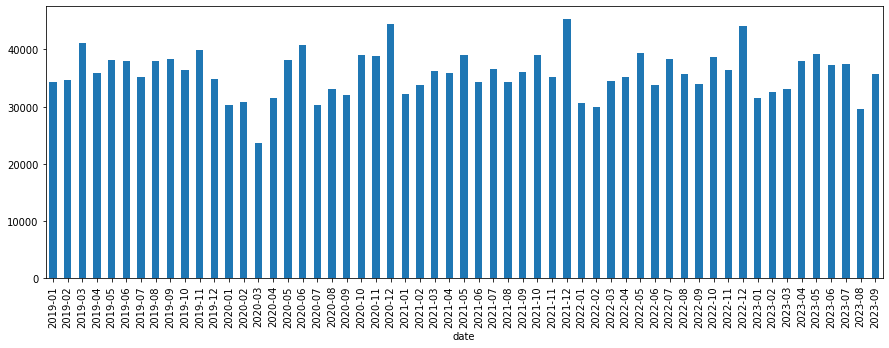

In [99]:
df_rina = df_m3[df_m3["TIPO_DETALLE"]=="RIÑA"]

df_rina.groupby(["date"])["CANT_INCIDENTES"].sum().plot.bar(figsize=(15,5))

<AxesSubplot:xlabel='date'>

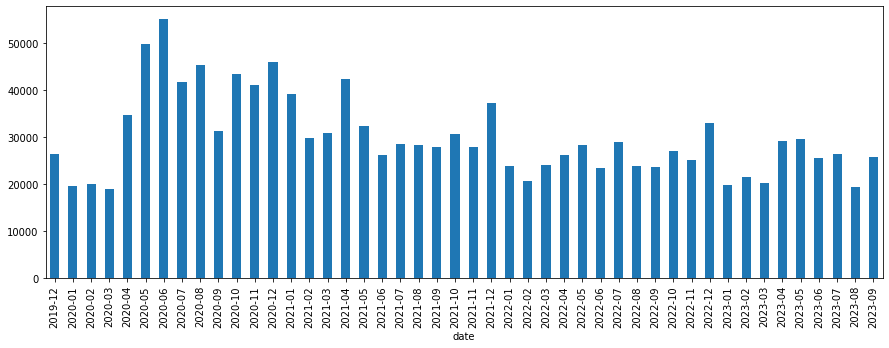

In [97]:
df_ruido = df_m3[df_m3["TIPO_DETALLE"]=="RUIDO"]

df_ruido.groupby("date")["CANT_INCIDENTES"].sum().plot.bar(figsize=(15,5))